In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [32]:
S= "EXPE"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("..//model_data//"+S+".csv")

In [33]:
df= pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-02,38.463363,38.476659,37.931551,38.144276,1391200
2010-11-03,38.117686,38.157573,37.452920,38.130981,2173000
2010-11-04,38.489946,38.503239,35.405430,36.123379,6803700
2010-11-05,36.349413,36.987588,36.149983,36.296230,4172300
2010-11-08,36.176564,37.253487,35.977135,37.253487,3333200


In [34]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-11-02 to 2020-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2518 non-null   float64
 1   High    2518 non-null   float64
 2   Low     2518 non-null   float64
 3   Close   2518 non-null   float64
 4   Volume  2518 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


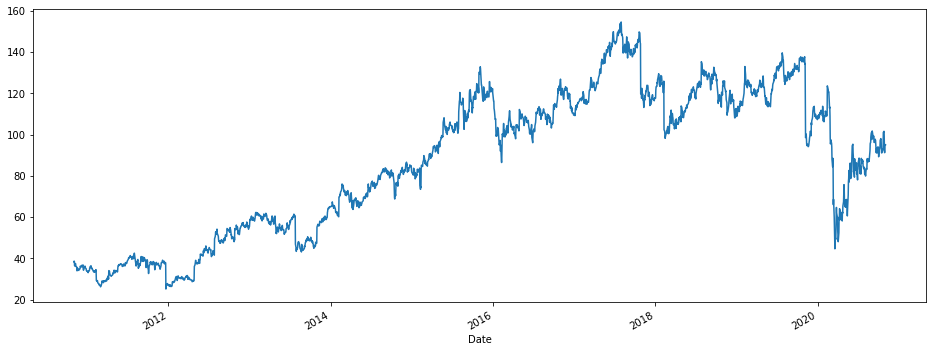

In [36]:
df['Open'].plot(figsize=(16,6))

In [37]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [39]:
X_train = []
y_train = []
for i in range(60, len(training_df)-4):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i+4, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train.shape

(1950, 60, 1)

In [41]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
# Initialising the RNN
regressor = Sequential()

In [44]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [45]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0250
Epoch 2/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0054
Epoch 3/100
1950/1950 [==============================] - 10s 5ms/step - loss: 0.0049
Epoch 4/100
1950/1950 [==============================] - 10s 5ms/step - loss: 0.0047
Epoch 5/100
1950/1950 [==============================] - 12s 6ms/step - loss: 0.0049
Epoch 6/100
1950/1950 [==============================] - 14s 7ms/step - loss: 0.0043
Epoch 7/100
1950/1950 [==============================] - 14s 7ms/step - loss: 0.0043
Epoch 8/100
1950/1950 [==============================] - 14s 7ms/step - loss: 0.0042
Epoch 9/100
1950/1950 [==============================] - 15s 8ms/step - loss: 0.0039
Epoch 10/100
1950/1950 [==============================] - 14s 7ms/step - loss: 0.0046: 2s - 
Epoch 11/100
1950/1950 [==============================] - 14s 7ms/step - loss: 0.0038
Epoch 12/100
1950/1950 [==============================] - 

# Testing

In [46]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicted_stock_price = regressor.predict(X_test)

In [49]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(440, 1)

In [50]:
y_test

array([[0.76932983],
       [0.77374257],
       [0.83323824],
       [0.80280561],
       [0.77724232],
       [0.76468883],
       [0.76537364],
       [0.77427521],
       [0.75380924],
       [0.78211148],
       [0.78249194],
       [0.78211153],
       [0.77861176],
       [0.7643845 ],
       [0.77161226],
       [0.76704747],
       [0.75852633],
       [0.76506933],
       [0.75761329],
       [0.76667244],
       [0.75957886],
       [0.73494202],
       [0.73715395],
       [0.73654387],
       [0.72540761],
       [0.72922132],
       [0.73158597],
       [0.73250124],
       [0.73234872],
       [0.74089146],
       [0.74043381],
       [0.74966308],
       [0.72853494],
       [0.74562052],
       [0.74150169],
       [0.72159386],
       [0.72029723],
       [0.72563651],
       [0.72144135],
       [0.73288253],
       [0.73845068],
       [0.74554426],
       [0.73860323],
       [0.74516291],
       [0.75080725],
       [0.75553631],
       [0.76034155],
       [0.768

In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [52]:
predicted_stock_price

array([[111.99774 ],
       [112.62896 ],
       [113.29956 ],
       [114.33079 ],
       [115.83981 ],
       [117.67102 ],
       [119.162315],
       [122.13752 ],
       [123.587006],
       [122.95773 ],
       [121.394875],
       [120.12501 ],
       [119.75535 ],
       [119.10976 ],
       [119.4997  ],
       [120.215324],
       [120.74671 ],
       [120.898964],
       [120.38103 ],
       [120.0867  ],
       [119.8932  ],
       [119.51898 ],
       [119.45405 ],
       [119.31412 ],
       [119.52075 ],
       [119.57895 ],
       [118.69    ],
       [117.81527 ],
       [117.29324 ],
       [116.71538 ],
       [116.416885],
       [116.431595],
       [116.59659 ],
       [116.752975],
       [117.148834],
       [117.50929 ],
       [118.04487 ],
       [117.74599 ],
       [117.77331 ],
       [117.836685],
       [117.168434],
       [116.34437 ],
       [115.93667 ],
       [115.689445],
       [115.93303 ],
       [116.478096],
       [117.17519 ],
       [117.4

In [53]:
actual_stock_price.shape

(440, 1)

In [54]:
predicted_stock_price.shape

(440, 1)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

8.468824160098107

In [56]:
df = pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df= df[['Open']]
df= df[int(len(df)*(4/5))+64:]
pred_df=pd.DataFrame(predicted_stock_price)
df['Open2']= predicted_stock_price

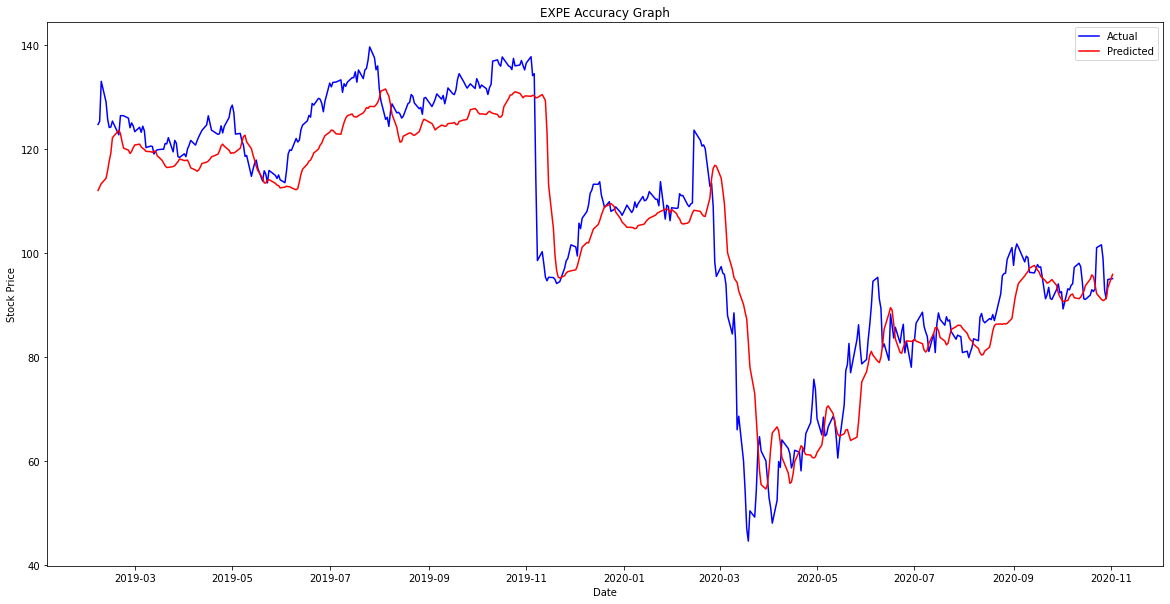

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Actual','Predicted'])
plt.savefig("..//model_data//"+S+'_accuracy_graph.png')

In [58]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

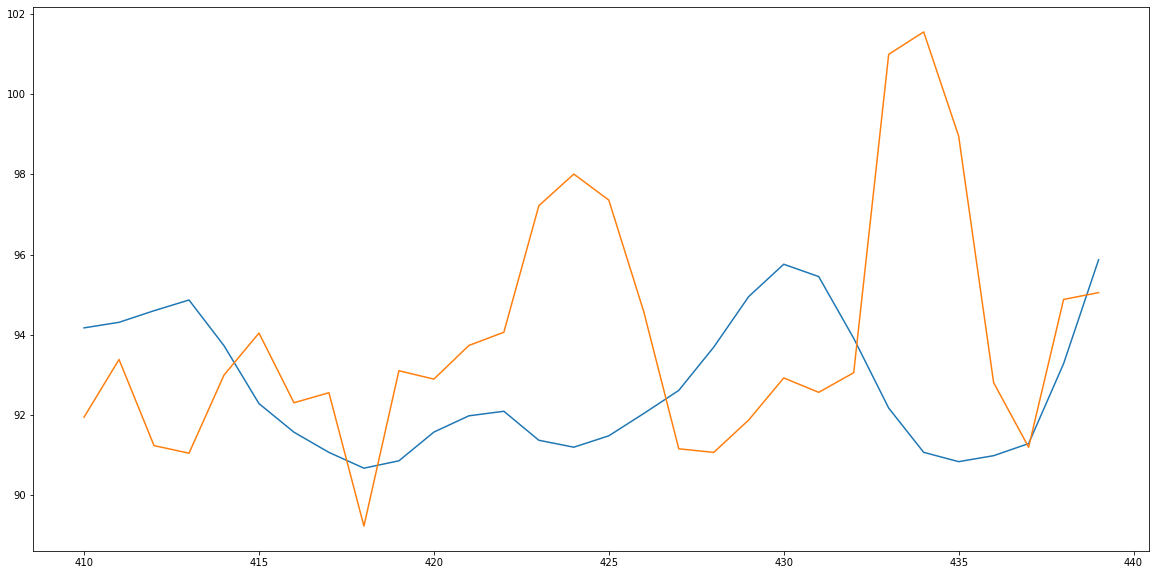

In [59]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [60]:
import pickle
Pkl_Filename = "..//model_data//"+S+"_Model.pkl"  
sc_file= "..//model_data//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)